In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
import torch
import torch.nn as nn

In [ ]:
df = pd.read_csv('train.csv')
df

# Data exploration

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df['Gender'].nunique()

In [ ]:
df['Geography'].nunique()

In [ ]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

In [ ]:
df2 = df

In [ ]:
map_dict = {'Female' : 0, 'Male' : 1}
df2['Gender'] = df2['Gender'].map(map_dict).astype(int)

In [ ]:
df2['Gender'].value_counts()

In [ ]:
df2['Geography'].value_counts()

In [ ]:
map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df2['Geography'] = df2['Geography'].map(map_dict).astype(int)

In [ ]:
#sns.pairplot(df2, hue="Exited")

In [ ]:
for column in df2.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df2[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df2['Balance'].value_counts()

In [ ]:
df2['Balance'].describe()

In [ ]:
df2_balance = df2[df2['Balance'] == 0]
df2_balance

In [ ]:
df2_balance['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')

In [ ]:
df2_balance['Exited'].plot(kind='hist', bins=20, title='Exited')

In [ ]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

# Data preprocessing

In [350]:
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [351]:
## Encoding categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Convert categorical label to binary numerical label
LabelEncoder = LabelEncoder()
X = X.copy()

# Encododing the label.
X['Geography'] = LabelEncoder.fit_transform(X['Geography'])
X['Gender'] = LabelEncoder.fit_transform(X['Gender'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03


In [352]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [353]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [354]:
# Convert Pandas to Numpy array
X = X.values
y = y.values

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [355]:
# Convert Numpy array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [356]:
random_state = 123

# Split the training data set to training (70%) and testing set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state
)

print(X_train.dtype)

#  Split the testing data set for validation (50%) and test (50%)
X_test, X_vali, y_test, y_vali = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)


torch.float32


In [357]:
# Check the size and type of datasets after the splitting
print("Training dataset")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [358]:
# Import Smote
from imblearn.over_sampling import SMOTE

# create the instance of SMOTE
smote = SMOTE(random_state=random_state)

# Resampling the X and Y training dataset with SMOTE to handle imbalance dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [359]:
# Check the size and type of datasets after the splitting
print("Training dataset")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Training dataset (Smote)")
print(X_train_smote.dtype, X_train_smote.shape)
print(y_train_smote.dtype, y_train_smote.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Training dataset (Smote)
float32 (182382, 10)
float32 (182382,)
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


# Data Scaling

In [360]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
normal_scaler = MinMaxScaler()

# Normalize X variables
X_train_smote_normalized = normal_scaler.fit_transform(X_train_smote)
X_vali_normalized = normal_scaler.transform(X_vali)
X_test_normalized = normal_scaler.transform(X_test)

In [361]:
# Convert to Tensor and rename the X variables
X_train = X_train_smote_normalized = torch.tensor(X_train_smote_normalized, dtype=torch.float32)
X_vali = X_vali_normalized = torch.tensor(X_vali_normalized, dtype=torch.float32)
X_test = X_test_normalized = torch.tensor(X_test_normalized, dtype=torch.float32)

# Move y_train_smote to y_train
y_train = torch.tensor(y_train_smote, dtype=torch.float32)

In [362]:
# Check the size and type of datasets after the splitting

print("Training dataset (Smote)")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation dataset")
print(X_vali.dtype, X_vali.shape)
print(y_vali.dtype, y_vali.shape)

print("Testing dataset")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training dataset (Smote)
torch.float32 torch.Size([182382, 10])
torch.float32 torch.Size([182382])
Validation dataset
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing dataset
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [363]:
# Increase the dimension of all label variables
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
y_vali = y_vali.unsqueeze(1)

# Final check the datasets before feeding them to the model
print("Training dataset")
print(X_train.dtype, X_train.shape, type(X_train))
print(y_train.dtype, y_train.shape, type(y_train))

print("Validation dataset")
print(X_vali.dtype, X_vali.shape, type(X_vali))
print(y_vali.dtype, y_vali.shape, type(y_vali))

print("Testing dataset")
print(X_test.dtype, X_test.shape, type(X_train))
print(y_test.dtype, y_test.shape, type(y_train))

Training dataset
torch.float32 torch.Size([182382, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([182382, 1]) <class 'torch.Tensor'>
Validation dataset
torch.float32 torch.Size([24756, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24756, 1]) <class 'torch.Tensor'>
Testing dataset
torch.float32 torch.Size([24755, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24755, 1]) <class 'torch.Tensor'>


In [364]:
# To make sure we conduct a fair comparison between PyTorch and MatLab, We will use the same datasets to train, validate, and test the model on both 2 platforms
# I exported these tensors to CSV files and will upload them for training, validating, and testing in MATLAB.
# Please note that we don't need to run this block anymore. We need it only for the preprocessing of the data. 
# So, I freeze this block of code.

# Convert 6 datasets from Tensor back to Numpy
#X_train_ndarray = X_train.numpy()
#X_test_ndarray = X_test.numpy()
#X_vali_ndarray = X_vali.numpy()
#y_train_ndarray = y_train.numpy()
#y_test_ndarray = y_test.numpy()
#y_vali_ndarray = y_vali.numpy()

# Save all datasets to CSV file
#np.savetxt('X_train_ndarray.csv', X_train_ndarray, delimiter=',')
#np.savetxt('X_test_ndarray.csv', X_test_ndarray, delimiter=',')
#np.savetxt('X_vali_ndarray.csv', X_vali_ndarray, delimiter=',')
#np.savetxt('y_train_ndarray.csv', y_train_ndarray, delimiter=',')
#np.savetxt('y_test_ndarray.csv', y_test_ndarray, delimiter=',')
#np.savetxt('y_vali_ndarray.csv', y_vali_ndarray, delimiter=',')

# Neural Network model (Class)

In [365]:
# Define the structure of the Neural network model
input_features = 10
output_features = 1

# Define hyperparameters for using in grid search to find the best combination
learning_rates_grid = [0.01, 0.001, 0.0001]
hidden_neurons_grid = [10, 20, 30, 40]

# The number of epochs
number_of_epochs = 1000

# Define the null variables to prepare for storing the result of the model
best_accuracy = 0.0
best_hyperparameters = {}

# Define the empty list to store the result of every combination of hyperparameters
learning_rates_list_heatmap = []
hidden_neurons_list_heatmap = []
accuracy_list_heatmap = []

In [366]:
# Build the class for Neural network model
class Credit_Churn_NN_Model(nn.Module):
    def __init__(self, input_features, hidden_neurons, output_features):
        super(Credit_Churn_NN_Model, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, output_features)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        output_layer1 = self.fc1(x)
        l1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(l1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated


In [367]:
# Build the function for the model
def train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_vali, y_vali, number_of_epochs):
    model = Credit_Churn_NN_Model(input_features, hidden_neurons, output_features)
    criterion = torch.nn.BCELoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Define value holder for plotting in the graph
    plot_train_loss = []
    plot_vali_loss = []

    # Iterate the model e time. e start from 0 to number_of_epochs - 1
    for e in range(number_of_epochs):
        # Training the model
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)
        train_loss.backward()
        optimizer.step()
        # append the loss value (Train) to the value holder
        plot_train_loss.append(train_loss)

        # Validation the model
        model.eval()
        with torch.no_grad():
            y_vali_pred = model(X_vali)
            vali_loss = criterion(y_vali_pred, y_vali)
            # append the loss value (Validation) to the value holder
            plot_vali_loss.append(vali_loss)

    return model, plot_train_loss, plot_vali_loss

# Fitting the model

In [368]:
# We will prepare the running time between Pytorch and MatLab
import time
# Start the timer
start_time = time.time()

# Grid search
for learning_rate in learning_rates_grid:
    for hidden_neurons in hidden_neurons_grid:
        print(f"Grid search > training the NNet model with learning rate={learning_rate} and hidden_neurons={hidden_neurons}")
        # Call the function to train and evaluate the model with the nested loop
        trained_model, train_loss, vali_loss = train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_vali, y_vali, number_of_epochs)

        # After calling the train_NN_model() function, We'll get the trained model
        # We will evaluate the performance of this model by feeding X trained to the trained model

        # Preduct y from the X_train
        y_train_pred = (trained_model(X_train).detach().numpy() > 0.5).astype(int)
        # Calculate the accuracy rate of the model
        accuracy = (y_train_pred == y_train.numpy()).mean()
        #accuracy = (y_train_pred == y_train.numpy()).sum()/len(y_train)
        print(f"Accuracy rate is {accuracy}")
        
        # Store the results in lists
        learning_rates_list_heatmap.append(learning_rate)
        hidden_neurons_list_heatmap.append(hidden_neurons)
        accuracy_list_heatmap.append(accuracy)

        # Check if the current hyperparameters yield a better performance
        if accuracy > best_accuracy: # if Yes
            best_accuracy = accuracy # Then reassign this hyperparameter's accuracy to the best_accuracy variable
            # And replace the best_hyperparameters with the new Lr and Neurons
            best_hyperparameters = {'learning_rate': learning_rate, 'hidden_neurons': hidden_neurons}
            # And replace the plot variable
            train_loss_for_plotting = train_loss
            vali_loss_for_plotting = vali_loss
            # And replace the model with the best model
            best_model = trained_model

# After the final of nested loop, print the highest one
print("\nThe Best Hyperparameters are ", best_hyperparameters)

# Stop the timer
end_time = time.time()
# Calculate the total time of running code
Total_time = end_time - start_time

print(f"Total time taken: {Total_time} seconds")


Training the NNet model with learning rate=0.01 and hidden_neurons=10
Accuracy rate is 0.8666315754844228

Training the NNet model with learning rate=0.01 and hidden_neurons=20
Accuracy rate is 0.8514436731695014

Training the NNet model with learning rate=0.01 and hidden_neurons=30
Accuracy rate is 0.884615806384402

Training the NNet model with learning rate=0.01 and hidden_neurons=40
Accuracy rate is 0.888278448531105

Training the NNet model with learning rate=0.001 and hidden_neurons=10
Accuracy rate is 0.7902479411345418

Training the NNet model with learning rate=0.001 and hidden_neurons=20
Accuracy rate is 0.8008794727549868

Training the NNet model with learning rate=0.001 and hidden_neurons=30
Accuracy rate is 0.8198945071333794

Training the NNet model with learning rate=0.001 and hidden_neurons=40
Accuracy rate is 0.8404118827515873

Training the NNet model with learning rate=0.0001 and hidden_neurons=10
Accuracy rate is 0.658063844019695

Training the NNet model with lear

In [369]:
y_train_pred[:30]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [370]:
best_hyperparameters

{'learning_rate': 0.01, 'hidden_neurons': 40}

In [371]:
input_features = 10
best_learning_rate = best_hyperparameters['learning_rate']
best_hidden_neurons = best_hyperparameters['hidden_neurons']

print(best_learning_rate)
print(best_hidden_neurons)

0.01
40


In [372]:
train_loss_for_plotting

[tensor(0.6923, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6843, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6769, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6695, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6620, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6544, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6468, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6391, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6315, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6242, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6173, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6109, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6053, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6004, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5962, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5926, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5894, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5863, grad_fn=<BinaryCrossEntropyBackw

In [373]:
# Convert from Tensor to list to prepare for plotting with Matplotlib
# Because we can't plot the tensor variables with Matplotlib
train_loss_for_plotting = [tensor_item.item() for tensor_item in train_loss_for_plotting]
vali_loss_for_plotting = [tensor_item.item() for tensor_item in vali_loss_for_plotting]
print(type(train_loss_for_plotting))
print(type(vali_loss_for_plotting))

# Create a numpy list from 1 to the number of epochs
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

<class 'list'>
<class 'list'>


numpy.ndarray

# Data evaluation

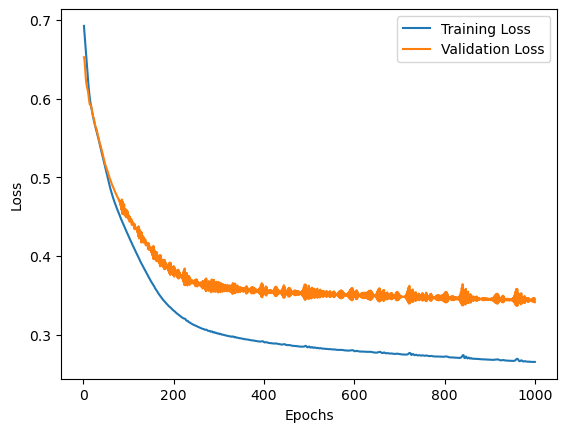

In [374]:
# Now, the type of train_loss_for_plotting and vali_loss_for_plotting are the list.
# We are ready to plot them in Matplotlib
plt.plot(Epochs, train_loss_for_plotting, label='Training Loss')
plt.plot(Epochs, vali_loss_for_plotting, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/var/folders/zm/yhwfnbzx577066vzj93f266w0000gn/T/ipykernel_2056/2253407842.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_heatmap_data = df_for_heatmap.pivot('Hidden Neurons', 'Learning Rate', 'Accuracy')


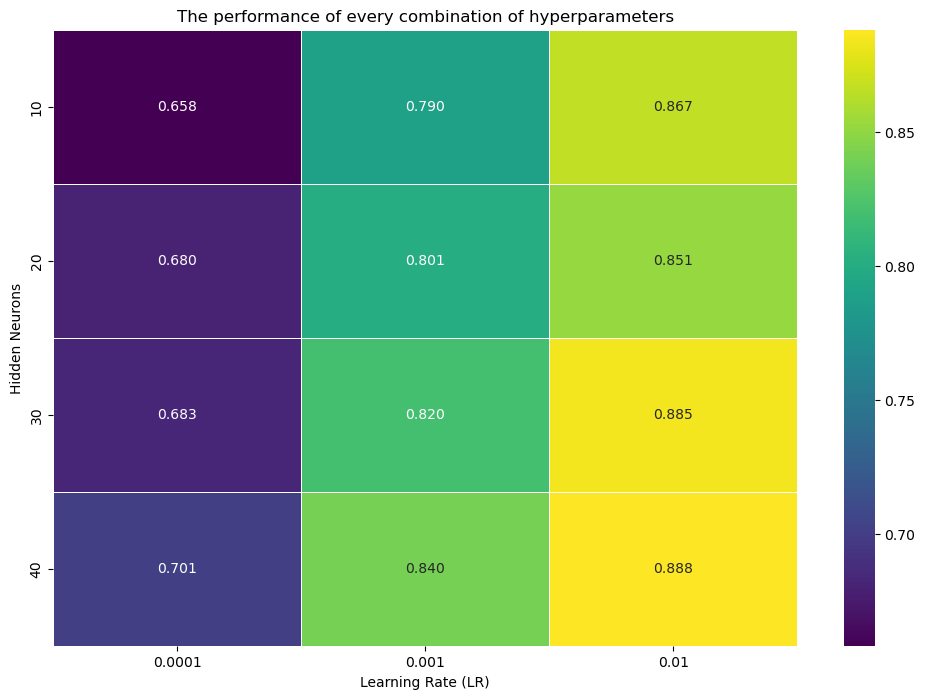

In [376]:
# Combine the lists into a DataFrame
df_for_heatmap = pd.DataFrame({'Learning Rate': learning_rates_list_heatmap, 'Hidden Neurons': hidden_neurons_list_heatmap, 'Accuracy': accuracy_list_heatmap})

# Pivot the DataFrame to create a matrix suitable for a heatmap
pivoted_heatmap_data = df_for_heatmap.pivot('Hidden Neurons', 'Learning Rate', 'Accuracy')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('The performance of every combination of hyperparameters')
plt.xlabel('Learning Rate (LR)')
plt.ylabel('Hidden Neurons')
plt.show()


In [377]:
# Testing data set

best_model.eval()

# From sigmoid probabilities to y labels
y_test_pred =  best_model(X_test)

# Calculate the accuracy rate
acc = (y_test_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 85.44%


In [378]:
# Calculate = True positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
TP = ((y_test_pred.round() == 1) & (y_test == 1)).sum().item()
TN = ((y_test_pred.round() == 0) & (y_test == 0)).sum().item()
FP = ((y_test_pred.round() == 1) & (y_test == 0)).sum().item()
FN = ((y_test_pred.round() == 0) & (y_test == 1)).sum().item()

# Calculate the confusion matrix 
# Apart from Accuracy rate, we measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Precision",precision)
print("Recall",recall)
print("F1 score",f1)

Precision 0.6663905570511494
Recall 0.6175398196123585
F1 score 0.6410358565737052


In [ ]:
y_test_pred[0:30]

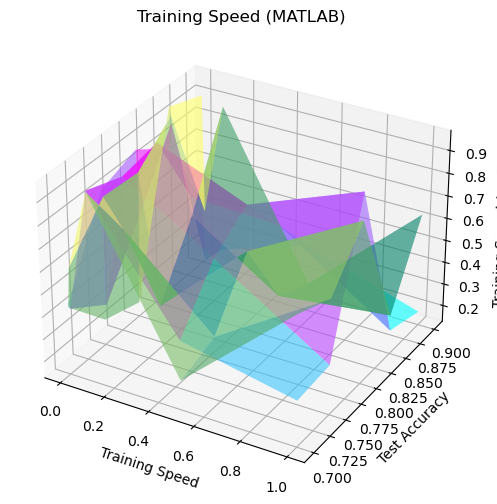

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data for Python and MATLAB (replace with your actual data)
python_training_speeds = np.random.rand(5, 5)  # Random values for training speeds
matlab_training_speeds = np.random.rand(5, 5)  # Random values for training speeds
test_accuracies = np.random.rand(5, 5)  # Random values for test accuracies

# Training speeds and test accuracies for the meshgrid
training_speeds = [0.001, 0.01, 0.1, 0.5, 1.0]  # Example training speeds
test_accuracies = [0.7, 0.75, 0.8, 0.85, 0.9]  # Example test accuracies

# Create meshgrid
X, Y = np.meshgrid(training_speeds, test_accuracies)

# Create a 3D figure
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot Python training speeds
ax.plot_surface(X, Y, python_training_speeds, cmap='summer', edgecolor='none', label='Python', alpha=0.6)
ax.set_xlabel('Training Speed')
ax.set_ylabel('Test Accuracy')
ax.set_zlabel('Training Speed (Python)')
ax.set_title('Training Speed (Python)')

# Plot MATLAB training speeds
ax.plot_surface(X, Y, matlab_training_speeds, cmap='cool', edgecolor='none', label='MATLAB', alpha=0.6)
ax.set_xlabel('Training Speed')
ax.set_ylabel('Test Accuracy')
ax.set_zlabel('Training Speed (MATLAB)')
ax.set_title('Training Speed (MATLAB)')

# Add a legend

plt.show()


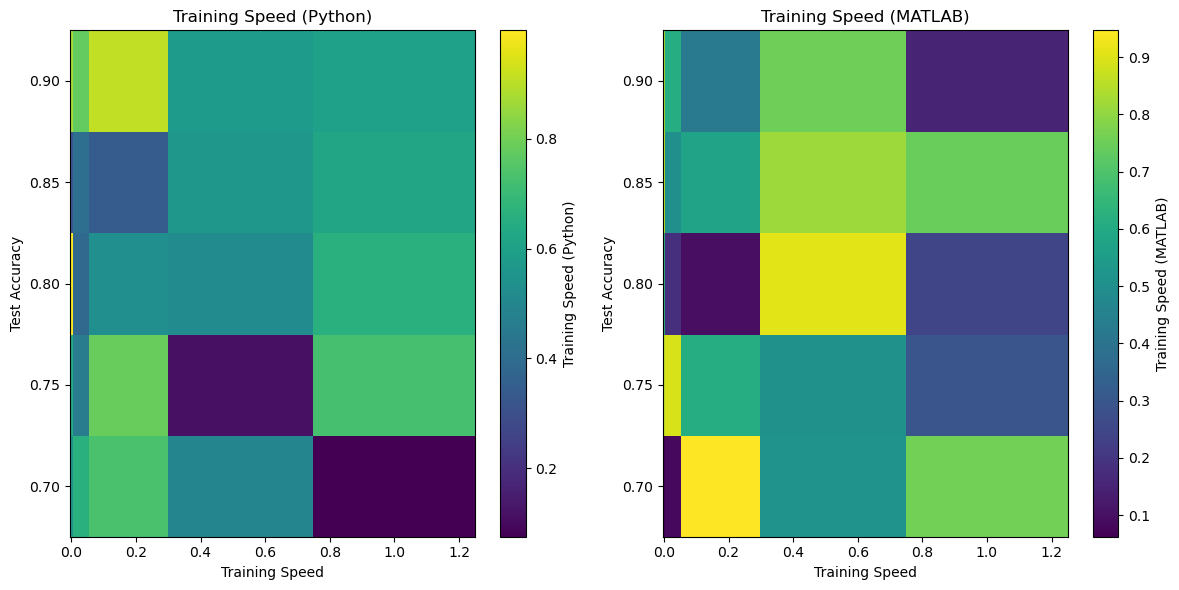

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for Python and MATLAB (replace with your actual data)
python_training_speeds = np.random.rand(5, 5)  # Random values for training speeds
matlab_training_speeds = np.random.rand(5, 5)  # Random values for training speeds
test_accuracies = np.random.rand(5, 5)  # Random values for test accuracies

# Training speeds and test accuracies for the meshgrid
training_speeds = [0.001, 0.01, 0.1, 0.5, 1.0]  # Example training speeds
test_accuracies = [0.7, 0.75, 0.8, 0.85, 0.9]  # Example test accuracies

# Create meshgrid
X, Y = np.meshgrid(training_speeds, test_accuracies)

# Plot Python training speeds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pcolor(X, Y, python_training_speeds, cmap='viridis', shading='auto')
plt.colorbar(label='Training Speed (Python)')
plt.title('Training Speed (Python)')
plt.xlabel('Training Speed')
plt.ylabel('Test Accuracy')

# Plot MATLAB training speeds
plt.subplot(1, 2, 2)
plt.pcolor(X, Y, matlab_training_speeds, cmap='viridis', shading='auto')
plt.colorbar(label='Training Speed (MATLAB)')
plt.title('Training Speed (MATLAB)')
plt.xlabel('Training Speed')
plt.ylabel('Test Accuracy')

plt.tight_layout()
plt.show()
